Dont forget to normalise the data (he guesses boosted trees will be the best)

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split


In [2]:
nutrition = pd.read_pickle("./nutrition_data_clean.pkl")
nutrition

,name,Food Group,Branded?,Price (£),Weight (GRAMS),Price per Weight (£/100Gram),Carbon Group,Land use (m2/100g),GHG(kgco2eq/100g),Water use (L/100g),Acidifying emissions(kgSO2eq/100g),Eutr emissions (kg PO43-eq per 100g),Calories,Fat (g),Protein (g),Carbohydrate (g),Sugars (g),Fiber (g),Cholesterol (mg),Saturated Fats (g)
0,Pillsbury Cinnamon Rolls With Icing Refrigerat...,Baked Foods,NaN,1.70,260.0,0.653846,Bread products,0.3482,0.1441,56.7,0.001209,0.000706,330,11.27,4.34,53.42,21.34,1.4,0.0,3.250
1,Waffles Buttermilk Frozen Ready-To-Heat,Baked Foods,X,1.50,567.0,0.264550,Bread products,0.3482,0.1441,56.7,0.001209,0.000706,273,9.22,6.58,41.05,4.30,2.2,15.0,1.898
2,Waffle Buttermilk Frozen Ready-To-Heat Toasted,Baked Foods,X,1.50,567.0,0.264550,Bread products,0.3482,0.1441,56.7,0.001209,0.000706,309,9.49,7.42,48.39,4.41,2.6,13.0,2.275
3,Waffle Buttermilk Frozen Ready-To-Heat Microwaved,Baked Foods,X,1.50,567.0,0.264550,Bread products,0.3482,0.1441,56.7,0.001209,0.000706,289,9.40,6.92,44.16,4.50,2.4,16.0,2.057
4,Waffle Plain Frozen Ready-To-Heat Microwave,Baked Foods,X,1.50,567.0,0.264550,Bread products,0.3482,0.1441,56.7,0.001209,0.000706,298,9.91,6.71,45.41,5.04,2.4,16.0,1.580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,Plantain Fried,Vegetables,NaN,0.90,85.0,1.058824,Other vegetables,0.0310,0.0455,8.3,0.000531,0.000186,241,10.16,1.66,40.60,19.10,2.9,0.0,1.507
1219,Romaine Lettuce Raw,Vegetables,NaN,1.00,400.0,0.250000,Other vegetables,0.0310,0.0455,8.3,0.000531,0.000186,19,0.27,1.39,3.78,0.71,3.1,0.0,0.053
1220,Palak Paneer,Vegetables,NaN,3.75,500.0,0.750000,Cheese,8.0642,2.1240,473.5,0.014894,0.008875,96,6.84,5.23,4.32,1.89,1.2,7.0,1.486
1221,Carrots Raw Salad,Vegetables,NaN,0.41,1000.0,0.041000,Other vegetables,0.0310,0.0455,8.3,0.000531,0.000186,208,15.70,1.22,17.17,11.23,2.3,9.0,2.452


Initially i want to ignore any collumns on carbon and just try to get a price predictor.

In [3]:
#cutting collumns 6 to 11
nutrition.drop(nutrition.columns[6:12], axis=1, inplace=True)
nutrition

,name,Food Group,Branded?,Price (£),Weight (GRAMS),Price per Weight (£/100Gram),Calories,Fat (g),Protein (g),Carbohydrate (g),Sugars (g),Fiber (g),Cholesterol (mg),Saturated Fats (g)
0,Pillsbury Cinnamon Rolls With Icing Refrigerat...,Baked Foods,NaN,1.70,260.0,0.653846,330,11.27,4.34,53.42,21.34,1.4,0.0,3.250
1,Waffles Buttermilk Frozen Ready-To-Heat,Baked Foods,X,1.50,567.0,0.264550,273,9.22,6.58,41.05,4.30,2.2,15.0,1.898
2,Waffle Buttermilk Frozen Ready-To-Heat Toasted,Baked Foods,X,1.50,567.0,0.264550,309,9.49,7.42,48.39,4.41,2.6,13.0,2.275
3,Waffle Buttermilk Frozen Ready-To-Heat Microwaved,Baked Foods,X,1.50,567.0,0.264550,289,9.40,6.92,44.16,4.50,2.4,16.0,2.057
4,Waffle Plain Frozen Ready-To-Heat Microwave,Baked Foods,X,1.50,567.0,0.264550,298,9.91,6.71,45.41,5.04,2.4,16.0,1.580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,Plantain Fried,Vegetables,NaN,0.90,85.0,1.058824,241,10.16,1.66,40.60,19.10,2.9,0.0,1.507
1219,Romaine Lettuce Raw,Vegetables,NaN,1.00,400.0,0.250000,19,0.27,1.39,3.78,0.71,3.1,0.0,0.053
1220,Palak Paneer,Vegetables,NaN,3.75,500.0,0.750000,96,6.84,5.23,4.32,1.89,1.2,7.0,1.486
1221,Carrots Raw Salad,Vegetables,NaN,0.41,1000.0,0.041000,208,15.70,1.22,17.17,11.23,2.3,9.0,2.452


In [4]:
#Cutting branded collumn(probably better to keep this and turn into 1s and 0s maybe)
nutrition.drop(nutrition.columns[2], axis=1, inplace=True)

In [5]:
nutrition.dropna(inplace=True) #getting rid of na values.

In [6]:
nutrition

,name,Food Group,Price (£),Weight (GRAMS),Price per Weight (£/100Gram),Calories,Fat (g),Protein (g),Carbohydrate (g),Sugars (g),Fiber (g),Cholesterol (mg),Saturated Fats (g)
0,Pillsbury Cinnamon Rolls With Icing Refrigerat...,Baked Foods,1.70,260.0,0.653846,330,11.27,4.34,53.42,21.34,1.4,0.0,3.250
1,Waffles Buttermilk Frozen Ready-To-Heat,Baked Foods,1.50,567.0,0.264550,273,9.22,6.58,41.05,4.30,2.2,15.0,1.898
2,Waffle Buttermilk Frozen Ready-To-Heat Toasted,Baked Foods,1.50,567.0,0.264550,309,9.49,7.42,48.39,4.41,2.6,13.0,2.275
3,Waffle Buttermilk Frozen Ready-To-Heat Microwaved,Baked Foods,1.50,567.0,0.264550,289,9.40,6.92,44.16,4.50,2.4,16.0,2.057
4,Waffle Plain Frozen Ready-To-Heat Microwave,Baked Foods,1.50,567.0,0.264550,298,9.91,6.71,45.41,5.04,2.4,16.0,1.580
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,Plantain Fried,Vegetables,0.90,85.0,1.058824,241,10.16,1.66,40.60,19.10,2.9,0.0,1.507
1219,Romaine Lettuce Raw,Vegetables,1.00,400.0,0.250000,19,0.27,1.39,3.78,0.71,3.1,0.0,0.053
1220,Palak Paneer,Vegetables,3.75,500.0,0.750000,96,6.84,5.23,4.32,1.89,1.2,7.0,1.486
1221,Carrots Raw Salad,Vegetables,0.41,1000.0,0.041000,208,15.70,1.22,17.17,11.23,2.3,9.0,2.452


In [7]:
X = nutrition.iloc[:, 5:]
y = nutrition.iloc[:, 4]

In [8]:
from sklearn import preprocessing
#only normalising X not y. Is this right?
norm_X = preprocessing.normalize(X, axis=0) #collum instead of row
norm_X = pd.DataFrame(norm_X, columns = X.columns)
X=norm_X
X

,Calories,Fat (g),Protein (g),Carbohydrate (g),Sugars (g),Fiber (g),Cholesterol (mg),Saturated Fats (g)
0,0.035649,0.019225,0.009091,0.042721,0.039173,0.006676,0.000000,0.015184
1,0.029491,0.015728,0.013783,0.032828,0.007893,0.010491,0.006927,0.008867
2,0.033380,0.016189,0.015543,0.038698,0.008095,0.012398,0.006003,0.010629
3,0.031220,0.016035,0.014496,0.035316,0.008261,0.011445,0.007388,0.009610
4,0.032192,0.016905,0.014056,0.036315,0.009252,0.011445,0.007388,0.007382
...,...,...,...,...,...,...,...,...
1184,0.026035,0.017332,0.003477,0.032469,0.035061,0.013829,0.000000,0.007041
1185,0.002053,0.000461,0.002912,0.003023,0.001303,0.014783,0.000000,0.000248
1186,0.010371,0.011668,0.010955,0.003455,0.003469,0.005722,0.003232,0.006943
1187,0.022470,0.026782,0.002556,0.013731,0.020615,0.010968,0.004156,0.011456


In [9]:
# # normalise the data by feature column
# from sklearn import preprocessing
# norm_data = preprocessing.normalize(nutrition, axis=0) #collum instead of row
# norm_data = pd.DataFrame(norm_data, columns = nutrition.columns) # processing loses columns headers so these must be reestablished
# norm_data

In [10]:
#nutrition = norm_data

In [11]:
# # Importing the dataset
# X = nutrition.iloc[:, 5:].values
# y = nutrition.iloc[:, 4].values
# X, y

In [12]:
y = np.ravel(y)
X = X.values

In [13]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [14]:
nn = MLPRegressor(random_state = 1, max_iter=500).fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


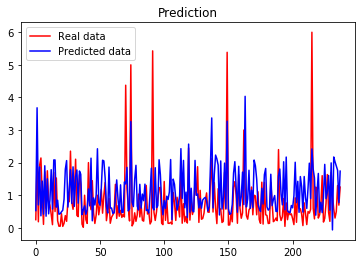

In [15]:
#validation curve
y_pred = nn.predict(X_test)

plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

In [16]:
#loss curve
#learning curve

Regression https://scikit-learn.org/stable/modules/model_evaluation.html

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html

In [17]:
from sklearn import metrics 

In [18]:
#‘explained_variance’, best possible score is one lower values are worse
metrics.explained_variance_score(y_test, y_pred)

0.054578076205264336

In [19]:
#‘max_error’ best case is zero but unlikely in the real world
metrics.max_error(y_test, y_pred)

4.80362123347551

In [20]:
#Mean absolute error regression loss.
metrics.mean_absolute_error(y_test, y_pred)

0.6565400741678376

In [21]:
#Mean squared error regression loss.
metrics.mean_squared_error(y_test, y_pred)

0.8311363135796181

In [22]:
#Median absolute error regression loss.
#The best value is 0.0
metrics.median_absolute_error(y_test, y_pred)

0.461489032684602

In [23]:
#r2 
#Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). 
#A constant model that always predicts the expected value of y, disregarding the input features, 
#would get a R^2 score of 0.0.
metrics.r2_score(y_test, y_pred)

-0.11761784700445244

Metrics and scoring SKLearn

https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

For continuity throughout the project we have chosen to use the following errors:
Mean Absolute Error, Mean Squared Error, Root Mean Squared Error.
We chose this as they are the most common measurement of errors used online, and we believe this is enough variety.

## Learning curve/Validation Curve

In [24]:
from sklearn import model_selection

In [25]:
estimator = nn

In [26]:
train_score, validation_score = model_selection.validation_curve(estimator, X_train, y_train, "activation", ('identity', 'logistic', 'tanh', 'relu'))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

In [27]:
train_sizes, train_scores, valid_scores = model_selection.learning_curve(estimator, X_train, y_train)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

If the training score and the validation score are both low, the estimator will be underfitting. If the training score is high and the validation score is low, the estimator is overfitting and otherwise it is working very well. A low training score and a high validation score is usually not possible. Underfitting, overfitting, and a working model are shown in the in the plot below where we vary the parameter  of an SVM on the digits dataset.

https://scikit-learn.org/stable/modules/learning_curve.html

# Hyperparameter tuning
In order to improve our model we will use hyperparameter tuning, and then do it on a random sample.\
Some of the parameters we can iterate over are:
- hidden_layer_sizes
- Activation function for the hidden layer.
- The solver for weight optimization.

Note: The default solver ‘adam’ works pretty well on relatively large datasets (with thousands of training samples or more) in terms of both training time and validation score. For small datasets, however, ‘lbfgs’ can converge faster and perform better.

## Exhaustive grid search 
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV

In [28]:
#They can do either an exhaustive grid search 

from sklearn.model_selection import GridSearchCV
estimator = nn
param_grid = {'activation':('identity', 'tanh', 'relu')}#, 'logistic'
#param_grid = {'solver':('lbfgs', 'sgd', 'adam')}
grid = model_selection.GridSearchCV(estimator, param_grid)

grid_result = grid.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Best: -0.097067 using {'activation': 'tanh'}


In [29]:
estimator = nn
param_grid = [ {'solver':('lbfgs', 'adam')}]#, 'sgd'
grid = model_selection.GridSearchCV(estimator, param_grid)

grid_result = grid.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Best: -0.255786 using {'solver': 'adam'}


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


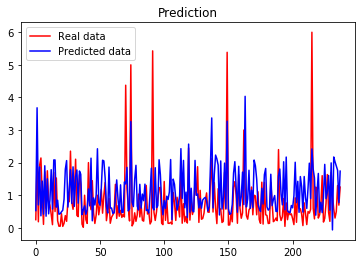

Mean Absolute Error: 0.6565400741678376
Mean Squared Error: 0.8311363135796181
Root Mean Squared Error: 0.9116667777097168


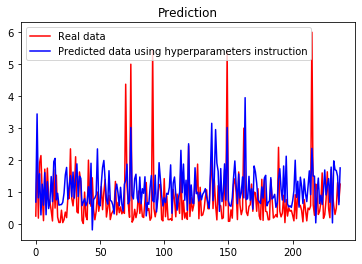

Mean Absolute Error: 0.6504312469338469
Mean Squared Error: 0.7845604541252056
Root Mean Squared Error: 0.8857541725135737


In [30]:
nn = MLPRegressor(random_state = 1, max_iter=500).fit(X_train, y_train)
y_pred = nn.predict(X_test)

plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

nn = MLPRegressor(random_state = 1, max_iter=500, solver = 'adam', activation = 'tanh').fit(X_train, y_train)
y_pred = nn.predict(X_test)

plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data using hyperparameters instruction')
plt.title('Prediction')
plt.legend()
plt.show()

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Trying to do both parameters at once ie parameter grid with more parameters:

In [31]:
nn = MLPRegressor(random_state = 1, max_iter=500).fit(X_train, y_train)
y_pred = nn.predict(X_test)

estimator = nn
#param_grid = [{'activation':('identity', 'logistic', 'tanh', 'relu'), 'solver':('lbfgs', 'sgd', 'adam')}]
param_grid = [{'activation':('identity', 'tanh', 'relu'), 'solver':('lbfgs', 'adam')}]
grid = model_selection.GridSearchCV(estimator, param_grid)

grid_result = grid.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

Best: -0.097067 using {'activation': 'tanh', 'solver': 'adam'}


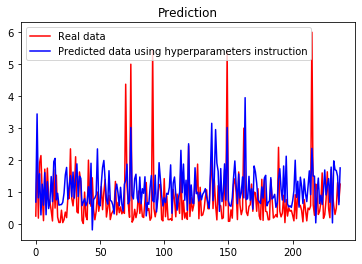

Mean Absolute Error: 0.6504312469338469
Mean Squared Error: 0.7845604541252056
Root Mean Squared Error: 0.8857541725135737


In [32]:
#now it picks differently as activation affects solver.
nn = MLPRegressor(random_state = 1, max_iter=500, solver = 'adam', activation = 'tanh').fit(X_train, y_train)
#nn = MLPRegressor(random_state = 1, max_iter=500, solver = 'lbfgs', activation = 'relu').fit(X_train, y_train)
y_pred = nn.predict(X_test)

plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data using hyperparameters instruction')
plt.title('Prediction')
plt.legend()
plt.show()

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

## Checking on another random state: not needed.

In [33]:
nn = MLPRegressor(random_state = 4, max_iter=500, solver = 'lbfgs', activation = 'relu').fit(X_train, y_train)
y_pred = nn.predict(X_test)

In [34]:
estimator = nn
param_grid = [{'activation':('identity', 'logistic', 'tanh', 'relu'), 'solver':('lbfgs', 'sgd', 'adam')}]
grid = model_selection.GridSearchCV(estimator, param_grid)

grid_result = grid.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best: -0.085343 using {'activation': 'logistic', 'solver': 'sgd'}


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Issue arises as different random states inputted lead to different recommendation for activation. DOESN'T MATTER

## Adding in the complexity of hidden layer sizes

In [35]:
nn = MLPRegressor(random_state = 1, max_iter=500, solver = 'lbfgs', activation = 'relu').fit(X_train, y_train)
y_pred = nn.predict(X_test)
estimator = nn
param_grid = [{'activation':('identity', 'logistic', 'tanh', 'relu'), 
               'solver':('lbfgs', 'sgd', 'adam'), 
               'hidden_layer_sizes':((90,),(100,), (99,), (101,), (150,), (200,), (2,32,))} 
              #not really sure how to proceed with letting it choose hidden_layer_sizes 
              #it seems to just want 100 as input
             ]
grid = model_selection.GridSearchCV(estimator, param_grid)

grid_result = grid.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

Best: -0.031231 using {'activation': 'identity', 'hidden_layer_sizes': (2, 32), 'solver': 'adam'}


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


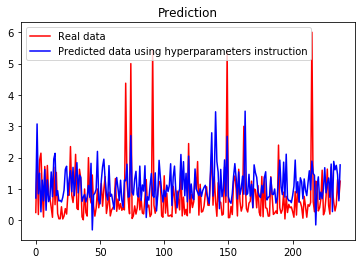

Mean Absolute Error: 0.6676542691788385
Mean Squared Error: 0.8267331389849293
Root Mean Squared Error: 0.9092486672989569


In [36]:
nn = MLPRegressor(random_state = 1, max_iter=500, solver = 'adam', activation = 'identity', hidden_layer_sizes=(2, 32)).fit(X_train, y_train)
#nn = MLPRegressor(random_state = 1, max_iter=500, solver = 'lbfgs', activation = 'relu').fit(X_train, y_train)
y_pred = nn.predict(X_test)

plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data using hyperparameters instruction')
plt.title('Prediction')
plt.legend()
plt.show()

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


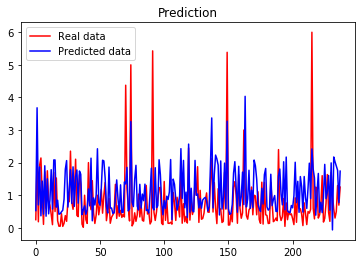

Mean Absolute Error: 0.6565400741678376
Mean Squared Error: 0.8311363135796181
Root Mean Squared Error: 0.9116667777097168


In [37]:
#comparison
nn = MLPRegressor(random_state = 1, max_iter=500).fit(X_train, y_train)
y_pred = nn.predict(X_test)

plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

## Using Randomized Parameter Optimization
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html#sklearn.model_selection.RandomizedSearchCV

Not useful to do it as already works with grid search


In [38]:
#should work on paper not sure why it doesnt
nn = MLPRegressor(random_state = 1, max_iter=500, solver = 'lbfgs', activation = 'relu').fit(X_train, y_train)
y_pred = nn.predict(X_test)

estimator = nn
param_grid = [{'activation':('identity', 'logistic', 'tanh', 'relu'), 'solver':('lbfgs', 'sgd', 'adam')}]

rdm = model_selection.RandomizedSearchCV(estimator, param_grid)

rdm_result = rdm.fit(X_train, y_train)

print("Best: %f using %s" % (rdm_result.best_score_, rdm_result.best_params_))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


AttributeError: 'list' object has no attribute 'values'